<a href="https://www.kaggle.com/code/arnabmukherjee853/bio-signal-analysis-smoking?scriptVersionId=237713179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-data/smoking.csv


# Problem Statement
1. To analyse given dataset and to find valuable insights from the data.
2. To built a classification model that correctly detects a smoker based on health parameters.

## Loading data.

In [2]:
df=pd.read_csv('/kaggle/input/smoking-data/smoking.csv')
df.tail()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
55687              0.9            1.0             1.0  ...        12.3   
55688              1.2            1.0             1.0  ...        14.0   
55689              1.2            1.0             1.0  ...        12.4   
55690              1.0            1.0             1.0  ...        14.4   
55691              0.7            1.0             1.0  ...        15.0   

       Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
55687            1.0               0.6  14.0   7.0  10.0     Y              1   
55688            1.0               0.9  20.0  12.0  14.0     Y              0   
55689            1.0               0.5  17.0  11.0  12.0     Y              0   
55690            1.0               0.7  20.0  19.0  18.0     Y              0   
55691            1.0               0.8  26.0  29.0  41.0     Y              0   

       tartar  smoking  
55687       Y        0  
55688       Y        0  
55689       N        0  
55690       N        0  
55691       Y        1  

[5 rows x 27 columns]

In [3]:
df.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
df['dental caries'].value_counts()

dental caries
0    43811
1    11881
Name: count, dtype: int64

In [6]:
df['dental caries'] = df['dental caries'].map({0:False,1:True})
df['dental caries']

0        False
1        False
2        False
3        False
4        False
         ...  
55687     True
55688    False
55689    False
55690    False
55691    False
Name: dental caries, Length: 55692, dtype: bool

In [7]:
df['smoking']=df['smoking'].astype('object')

In [8]:
df.tail()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
55687              0.9            1.0             1.0  ...        12.3   
55688              1.2            1.0             1.0  ...        14.0   
55689              1.2            1.0             1.0  ...        12.4   
55690              1.0            1.0             1.0  ...        14.4   
55691              0.7            1.0             1.0  ...        15.0   

       Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
55687            1.0               0.6  14.0   7.0  10.0     Y           True   
55688            1.0               0.9  20.0  12.0  14.0     Y          False   
55689            1.0               0.5  17.0  11.0  12.0     Y          False   
55690            1.0               0.7  20.0  19.0  18.0     Y          False   
55691            1.0               0.8  26.0  29.0  41.0     Y          False   

       tartar  smoking  
55687       Y        0  
55688       Y        0  
55689       N        0  
55690       N        0  
55691       Y        1  

[5 rows x 27 columns]

## Visualization

In [9]:
import matplotlib.pyplot as  plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df.drop(columns=['ID'],inplace=True)

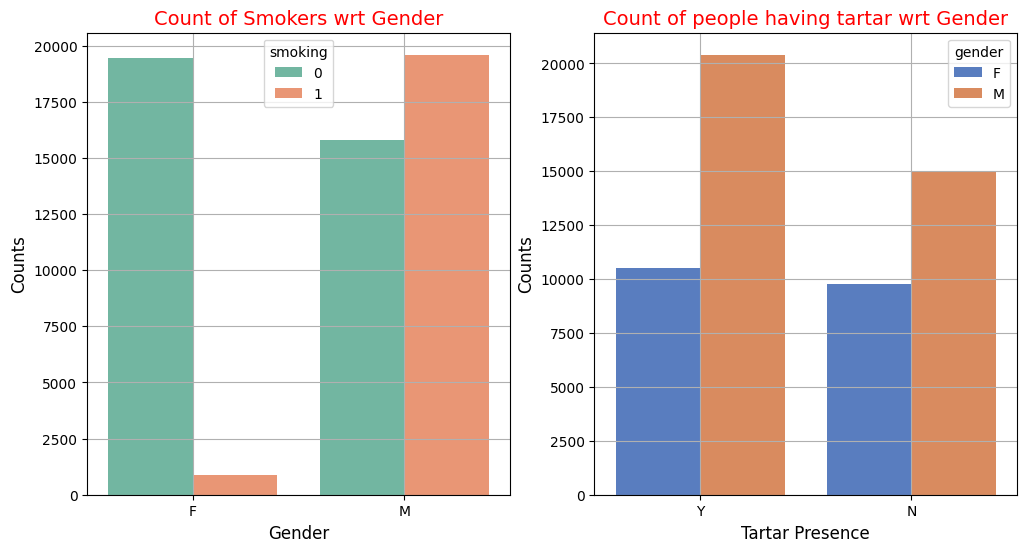

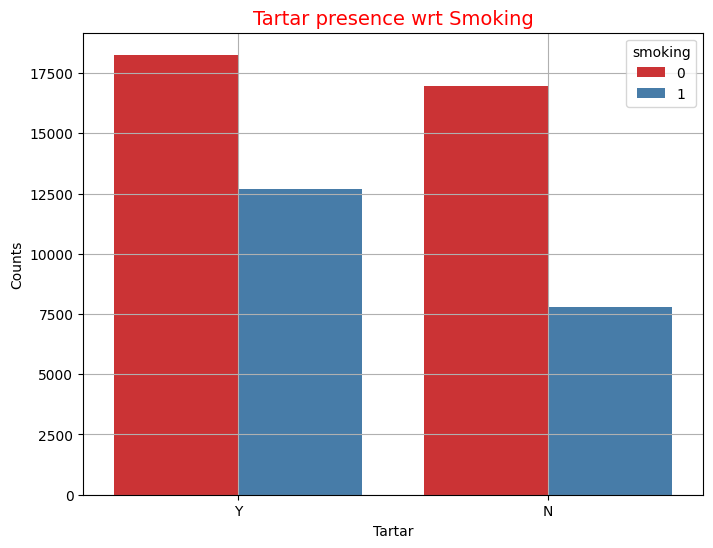

In [11]:
fig,(ax,bx)=plt.subplots(ncols=2,figsize=(12,6))
sns.countplot(data=df,x='gender',hue='smoking',ax=ax,palette='Set2')
sns.countplot(data=df,x='tartar',hue='gender',ax=bx,palette='muted')
ax.set_xlabel('Gender',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)
ax.set_title('Count of Smokers wrt Gender',fontsize=14,color='red')
ax.grid(True)
bx.set_xlabel('Tartar Presence',fontsize=12)
bx.set_ylabel('Counts',fontsize=12)
bx.set_title('Count of people having tartar wrt Gender',fontsize=14,color='red')
bx.grid(True)
fig,x=plt.subplots(figsize=(8,6))
sns.countplot(data=df,x='tartar',hue='smoking',ax=x,palette='Set1')
x.set_xlabel('Tartar')
x.set_ylabel('Counts')
x.set_title('Tartar presence wrt Smoking',fontsize=14,color='red')
x.grid(True)

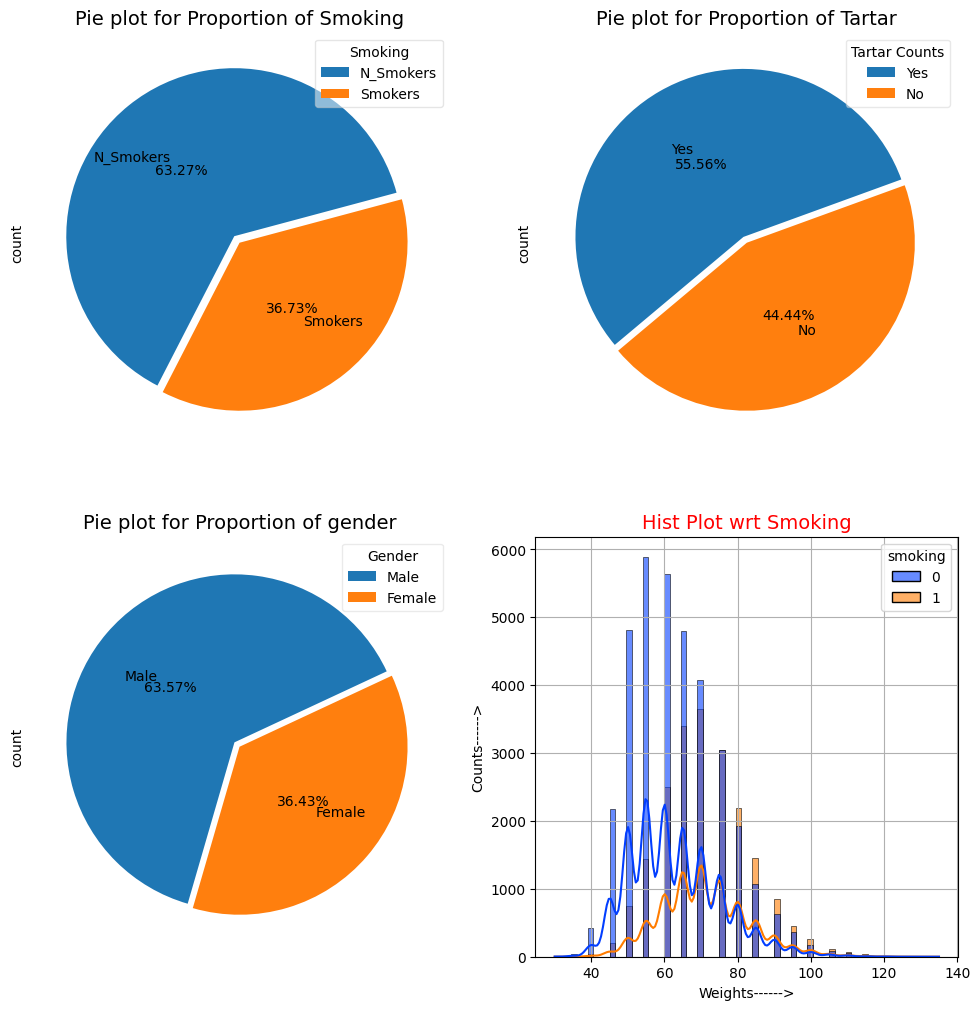

In [12]:
fig,((ax,bx),(cx,dx))=plt.subplots(ncols=2,figsize=(12,12),nrows=2)
df['smoking'].value_counts().plot.pie(autopct='%0.2f%%',
                                      pctdistance=0.5,
                                      explode=(0.05,0),
                                      ax=ax,
                                      startangle=15,
                                      labels=['N_Smokers','Smokers'],
                                      labeldistance=0.6)
ax.legend(loc='upper right',title='Smoking',framealpha=0.5)
df['tartar'].value_counts().plot.pie(autopct='%0.2f%%',
                                     pctdistance=0.5,
                                     explode=(0.04,0),
                                     ax=bx,
                                     startangle=20,
                                     labels=['Yes','No'],
                                     labeldistance=0.6)
bx.legend(loc='upper right',title='Tartar Counts',framealpha=0.45)
df['gender'].value_counts().plot.pie(autopct='%0.2f%%',
                                     pctdistance=0.5,
                                     explode=(0.04,0),
                                     ax=cx,
                                     startangle=25,
                                     labels=['Male','Female'],
                                     labeldistance=0.6)
cx.legend(loc='best',framealpha=0.4,title='Gender')
sns.histplot(data=df,x='weight(kg)',hue='smoking',ax=dx,palette='bright',bins=70,alpha=.6,kde=True)
ax.set_title('Pie plot for Proportion of Smoking',fontsize=14)
bx.set_title('Pie plot for Proportion of Tartar',fontsize=14)
cx.set_title('Pie plot for Proportion of gender',fontsize=14)
dx.set_xlabel('Weights------>')
dx.set_ylabel('Counts------>')
dx.set_title('Hist Plot wrt Smoking',color='red',fontsize=14)
dx.grid(True)

In [13]:
outer = df.smoking.value_counts()
outer.values

array([35237, 20455])

In [14]:
ni=df.groupby(['smoking'])['tartar'].value_counts()
print('middle pie values:: ',ni.values)
print('middle pie lavels:: ',ni.index.get_level_values(1))
ni

middle pie values::  [18260 16977 12680  7775]
middle pie lavels::  Index(['Y', 'N', 'Y', 'N'], dtype='object', name='tartar')


smoking  tartar
0        Y         18260
         N         16977
1        Y         12680
         N          7775
Name: count, dtype: int64

In [15]:
print(ni.index.get_level_values(1))

Index(['Y', 'N', 'Y', 'N'], dtype='object', name='tartar')


In [16]:
inner=df.groupby('smoking')[['tartar','gender']].value_counts()
print(inner.values)
print(inner.index.get_level_values(0))
print(inner.index.get_level_values(1))
print(inner.index.get_level_values(2))
inner

[ 9989  9443  8271  7534 12135  7461   545   314]
Index([0, 0, 0, 0, 1, 1, 1, 1], dtype='int64', name='smoking')
Index(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N'], dtype='object', name='tartar')
Index(['F', 'F', 'M', 'M', 'M', 'M', 'F', 'F'], dtype='object', name='gender')


smoking  tartar  gender
0        Y       F          9989
         N       F          9443
         Y       M          8271
         N       M          7534
1        Y       M         12135
         N       M          7461
         Y       F           545
         N       F           314
Name: count, dtype: int64

In [17]:
print(inner.index.get_level_values(2))
print(inner.values)

Index(['F', 'F', 'M', 'M', 'M', 'M', 'F', 'F'], dtype='object', name='gender')
[ 9989  9443  8271  7534 12135  7461   545   314]


In [18]:
inner_pie = [9989,8271,9443,7534,545,12135,314,7461]

In [19]:
inner_levels = ['F','M','F','M','F','M','F','M']

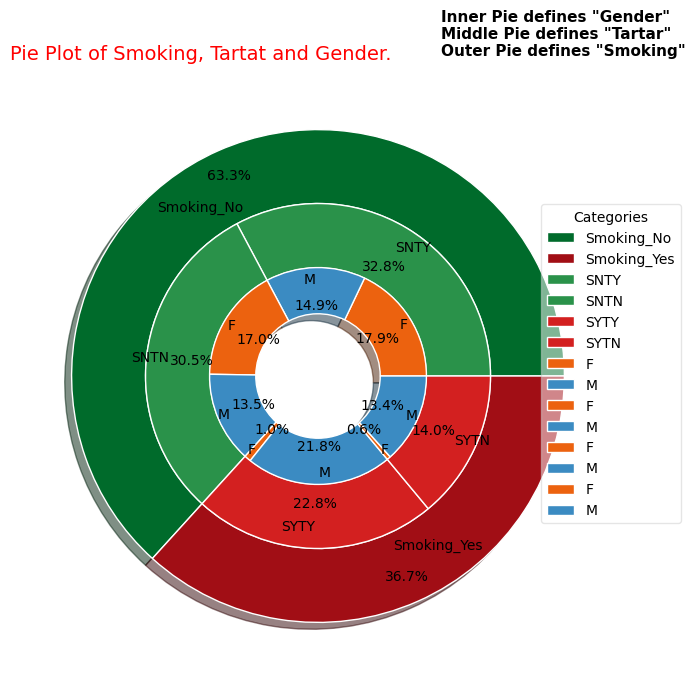

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_facecolor('white')
size = 0.3
a,b=[plt.cm.Greens,plt.cm.Reds]
d,c=[plt.cm.Blues,plt.cm.Oranges]
ax.pie(outer.values, radius=1,
       labels=["Smoking_No","Smoking_Yes"],                                     
       autopct='%1.1f%%',
       pctdistance=0.89,
       wedgeprops=dict(width=size,edgecolor='white'),
       labeldistance=0.75,
       colors=[a(.88),b(.88)],
       shadow=True)
       

ax.pie(ni.values, radius=.7,
       autopct='%1.1f%%', 
       pctdistance=0.74,
       labels=['SNTY','SNTN','SYTY','SYTN'],                          
       wedgeprops=dict(width=size/1.15,edgecolor='white'),
       labeldistance=0.87,
       colors=[a(0.72),a(0.72),b(0.72),b(0.72)])

ax.pie(inner_pie,radius=.44,
       shadow=True,
       autopct='%1.1f%%',pctdistance=.65,
       labeldistance=0.89,
       labels=inner_levels,
       wedgeprops=dict(width=size/1.6,edgecolor='white'),
       colors=[c(0.65),d(0.65),c(0.65),d(0.65),c(0.65),d(0.65),c(0.65),d(0.65)])

ax.set(aspect="equal")
ax.text(0.5, 1.3, 'Outer Pie defines "Smoking"', fontsize=11,fontweight='bold')
ax.text(0.5, 1.37, 'Middle Pie defines "Tartar"', fontsize=11,fontweight='bold')
ax.text(0.5, 1.44, 'Inner Pie defines "Gender"', fontsize=11,fontweight='bold')
plt.legend(loc='lower right',title='Categories',framealpha=0.5,bbox_to_anchor=(1.1,0.25))
plt.title('Pie Plot of Smoking, Tartat and Gender.',fontsize=14,color='red',loc='left')
plt.show()

In [21]:
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      F   40         155          60       81.3             1.2   
1      F   40         160          60       81.0             0.8   
2      M   55         170          60       80.0             0.8   
3      M   40         165          70       88.0             1.5   
4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0            1.0             1.0     114.0  ...        12.9   
1              0.6            1.0             1.0     119.0  ...        12.7   
2              0.8            1.0             1.0     138.0  ...        15.8   
3              1.5            1.0             1.0     100.0  ...        14.7   
4              1.0            1.0             1.0     120.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y          False   
1            1.0               0.6  22.0  19.0  18.0     Y          False   
2            1.0               1.0  21.0  16.0  22.0     Y          False   
3            1.0               1.0  19.0  26.0  18.0     Y          False   
4            1.0               0.6  16.0  14.0  22.0     Y          False   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 26 columns]

In [22]:
df['dental caries'].value_counts()

dental caries
False    43811
True     11881
Name: count, dtype: int64

In [23]:
df['Urine protein'].value_counts()

Urine protein
1.0    52599
2.0     1795
3.0      940
4.0      260
5.0       88
6.0       10
Name: count, dtype: int64

In [24]:
df=df.drop(columns=['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)'],inplace=False)
df

gender  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  \
0          F   40         155          60       81.3     114.0        73.0   
1          F   40         160          60       81.0     119.0        70.0   
2          M   55         170          60       80.0     138.0        86.0   
3          M   40         165          70       88.0     100.0        60.0   
4          F   40         155          60       86.0     120.0        74.0   
...      ...  ...         ...         ...        ...       ...         ...   
55687      F   40         170          65       75.0     110.0        68.0   
55688      F   45         160          50       70.0     101.0        62.0   
55689      F   55         160          50       68.5     117.0        72.0   
55690      M   60         165          60       78.0     133.0        76.0   
55691      M   55         160          65       85.0     124.0        75.0   

       fasting blood sugar  Cholesterol  triglyceride  ...  hemoglobin  \
0                     94.0        215.0          82.0  ...        12.9   
1                    130.0        192.0         115.0  ...        12.7   
2                     89.0        242.0         182.0  ...        15.8   
3                     96.0        322.0         254.0  ...        14.7   
4                     80.0        184.0          74.0  ...        12.5   
...                    ...          ...           ...  ...         ...   
55687                 89.0        213.0          99.0  ...        12.3   
55688                 89.0        166.0          69.0  ...        14.0   
55689                 88.0        158.0          77.0  ...        12.4   
55690                107.0        210.0          79.0  ...        14.4   
55691                 82.0        213.0         142.0  ...        15.0   

       Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0                1.0               0.7  18.0  19.0  27.0     Y          False   
1                1.0               0.6  22.0  19.0  18.0     Y          False   
2                1.0               1.0  21.0  16.0  22.0     Y          False   
3                1.0               1.0  19.0  26.0  18.0     Y          False   
4                1.0               0.6  16.0  14.0  22.0     Y          False   
...              ...               ...   ...   ...   ...   ...            ...   
55687            1.0               0.6  14.0   7.0  10.0     Y           True   
55688            1.0               0.9  20.0  12.0  14.0     Y          False   
55689            1.0               0.5  17.0  11.0  12.0     Y          False   
55690            1.0               0.7  20.0  19.0  18.0     Y          False   
55691            1.0               0.8  26.0  29.0  41.0     Y          False   

      tartar  smoking  
0          Y        0  
1          Y        0  
2          N        1  
3          Y        0  
4          N        0  
...      ...      ...  
55687      Y        0  
55688      Y        0  
55689      N        0  
55690      N        0  
55691      Y        1  

[55692 rows x 22 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   systolic             55692 non-null  float64
 6   relaxation           55692 non-null  float64
 7   fasting blood sugar  55692 non-null  float64
 8   Cholesterol          55692 non-null  float64
 9   triglyceride         55692 non-null  float64
 10  HDL                  55692 non-null  float64
 11  LDL                  55692 non-null  float64
 12  hemoglobin           55692 non-null  float64
 13  Urine protein        55692 non-null  float64
 14  serum creatinine     55692 non-null  float64
 15  AST                  55692 non-null 

In [26]:
cols=[i for i in df.columns if df[i].dtypes in ['int64','float64']]
print(len(cols))

17


**Outliers detection using Histogram plot**

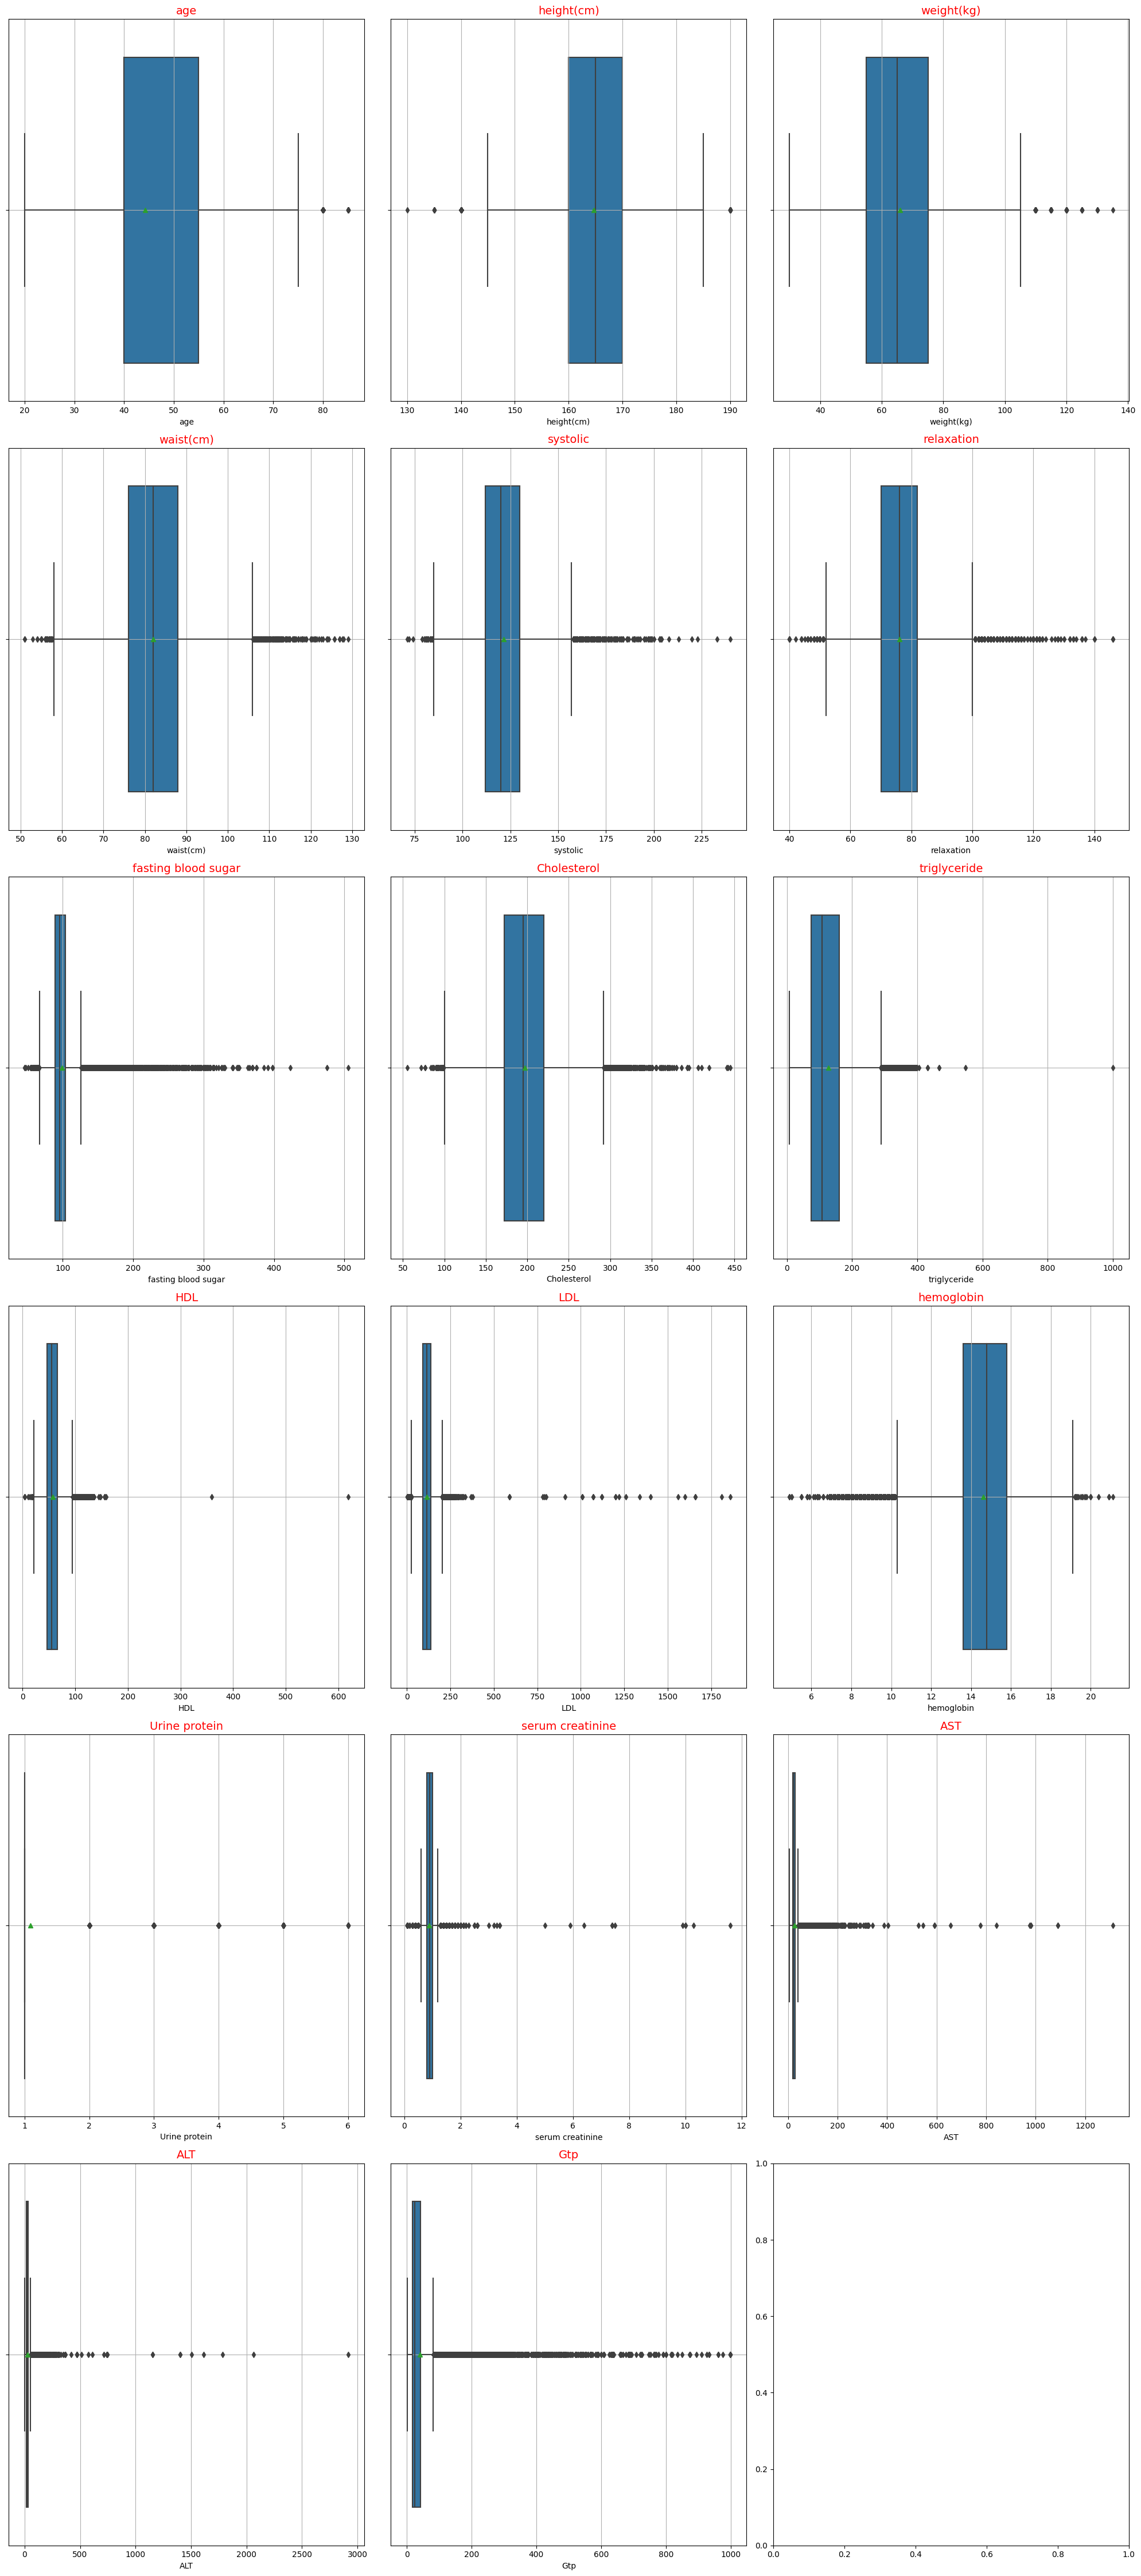

In [27]:
fig, axes = plt.subplots(6,3, figsize=(20,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.boxplot(data=df,x=cols[i],ax=ax,showmeans=True)
    ax.set_title(cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()

**Distribution of numeric features**

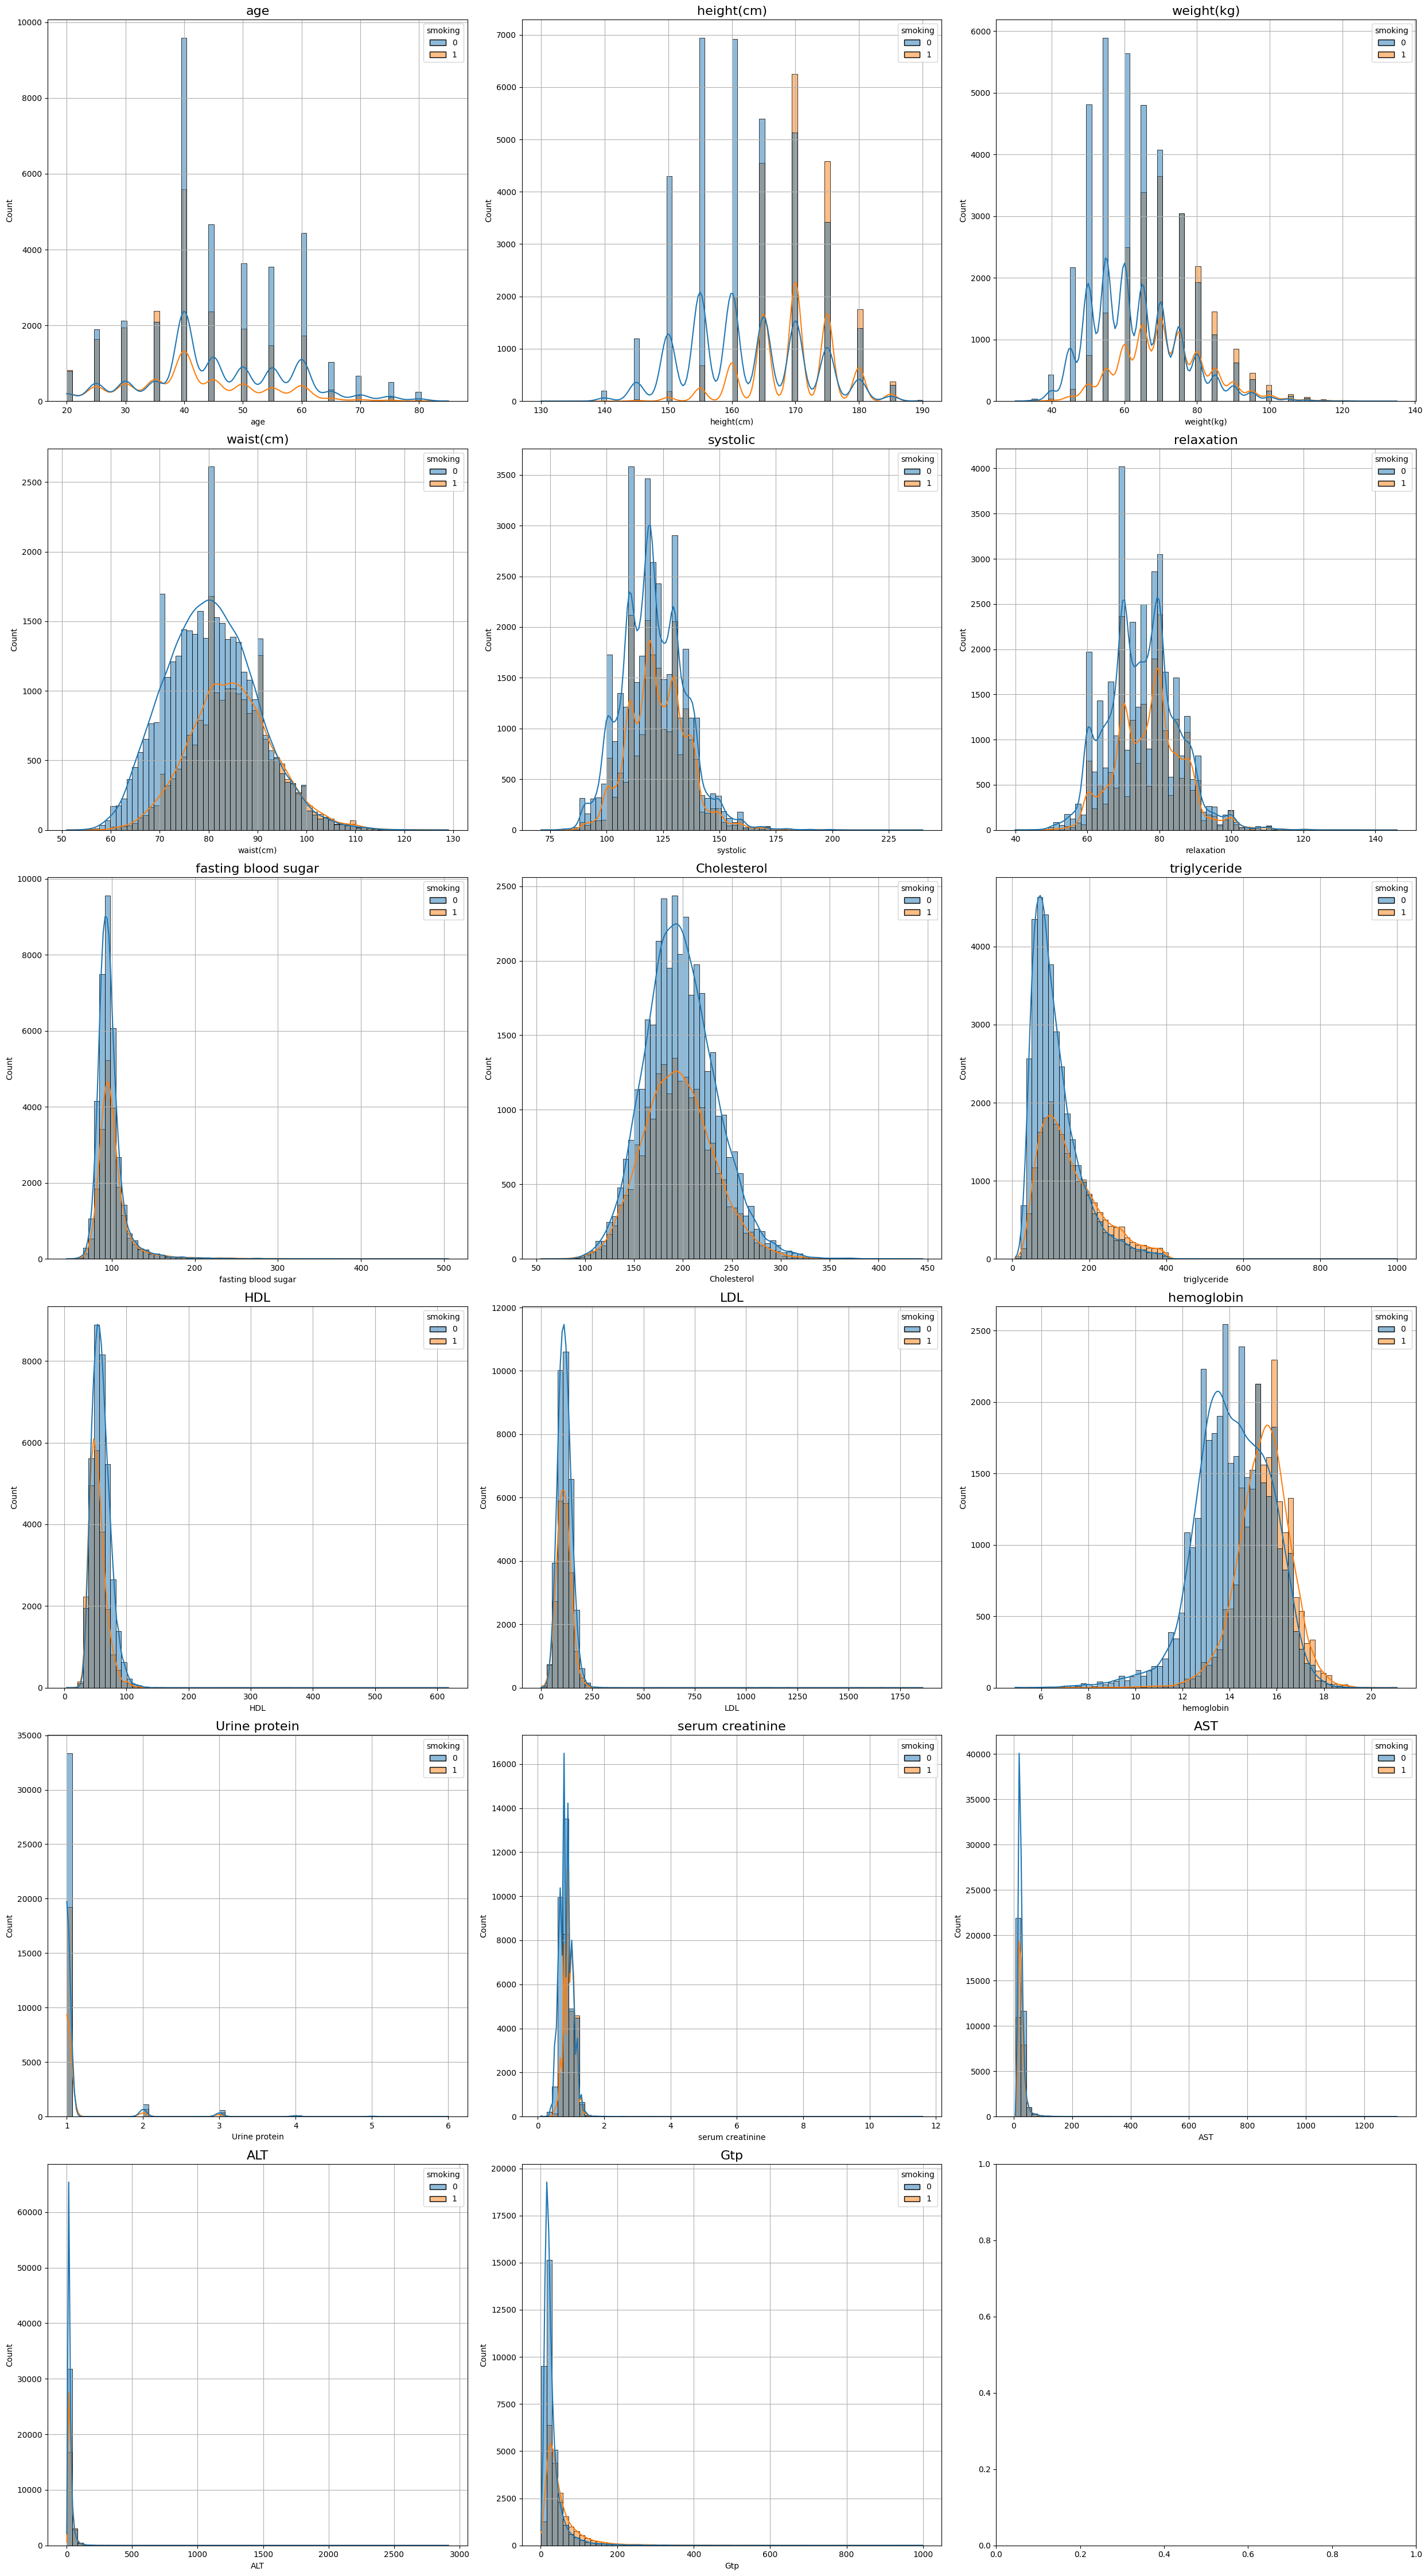

In [28]:
fig, axes = plt.subplots(6,3,figsize=(25,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.histplot(data=df,x=cols[i],ax=ax,bins=70,kde=True,color='red',hue='smoking')
    ax.set_title(cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

**Extracting most influencial parameters**

In [29]:
df1=df.copy()

In [30]:
X = df1.loc[:,df1.columns!='smoking']

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   systolic             55692 non-null  float64
 6   relaxation           55692 non-null  float64
 7   fasting blood sugar  55692 non-null  float64
 8   Cholesterol          55692 non-null  float64
 9   triglyceride         55692 non-null  float64
 10  HDL                  55692 non-null  float64
 11  LDL                  55692 non-null  float64
 12  hemoglobin           55692 non-null  float64
 13  Urine protein        55692 non-null  float64
 14  serum creatinine     55692 non-null  float64
 15  AST                  55692 non-null 

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','oral','tartar']
for col in cols:
    X[col]=le.fit_transform(X[col])

df1['smoking']=le.fit_transform(df1['smoking'])
y = df1.smoking

/tmp/ipykernel_26/1854588694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=le.fit_transform(X[col])
/tmp/ipykernel_26/1854588694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=le.fit_transform(X[col])
/tmp/ipykernel_26/1854588694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

<Axes: >

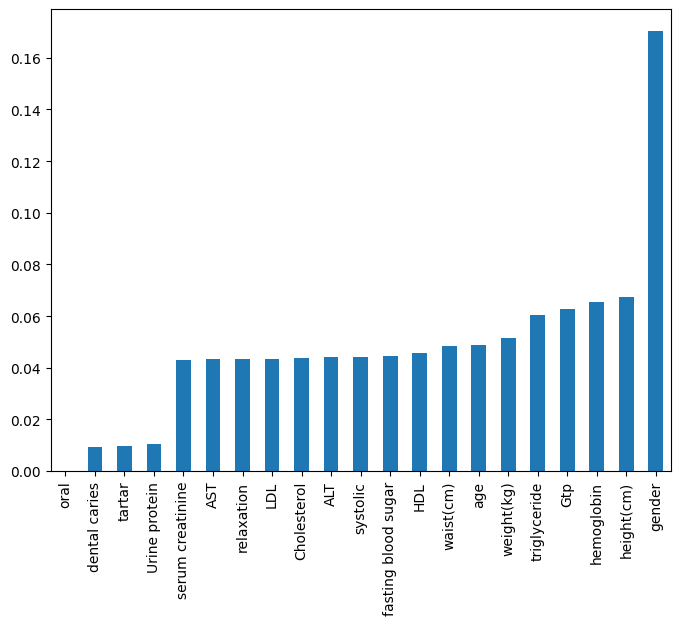

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X,y)
df_new=pd.Series(ETC.feature_importances_,index=X.columns)
plt.figure(figsize=(8,6))
df_new.sort_values().plot(kind='bar')

**Dropping less influencial features**

In [34]:
df.drop(columns=['oral','dental caries','tartar','Urine protein'],inplace=True)

**Outliers Handling**

In [35]:
n_cols = df.select_dtypes(include=['int','float']).columns
n_cols

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')

In [36]:
cat_cols = df.select_dtypes(include=['bool','object']).columns
cat_cols

Index(['gender', 'smoking'], dtype='object')

# Outliers detection and filtration.

In [37]:
def Outliers_handling(df):
    Q1=df[n_cols].quantile(0.25)
    Q3=df[n_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    outliers_row = df[n_cols].apply(lambda x:(x<lower_b[x.name])|(x>upper_b[x.name])).any(axis=1)
    cleaned_df = df[~outliers_row].copy()
    cleaned_df[cat_cols] = df.loc[cleaned_df.index,cat_cols]
    return cleaned_df

df = Outliers_handling(df)
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  \
0      F   40         155          60       81.3     114.0        73.0   
2      M   55         170          60       80.0     138.0        86.0   
4      F   40         155          60       86.0     120.0        74.0   
5      M   30         180          75       85.0     128.0        76.0   
6      M   40         160          60       85.5     116.0        82.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0          82.0  73.0  126.0        12.9   
2                 89.0        242.0         182.0  55.0  151.0        15.8   
4                 80.0        184.0          74.0  62.0  107.0        12.5   
5                 95.0        217.0         199.0  48.0  129.0        16.2   
6                 94.0        226.0          68.0  55.0  157.0        17.0   

   serum creatinine   AST   ALT   Gtp smoking  
0               0.7  18.0  19.0  27.0       0  
2               1.0  21.0  16.0  22.0       1  
4               0.6  16.0  14.0  22.0       0  
5               1.2  18.0  27.0  33.0       0  
6               0.7  21.0  27.0  39.0       1

**Contineous data visualisation by Histogram after cleaning**

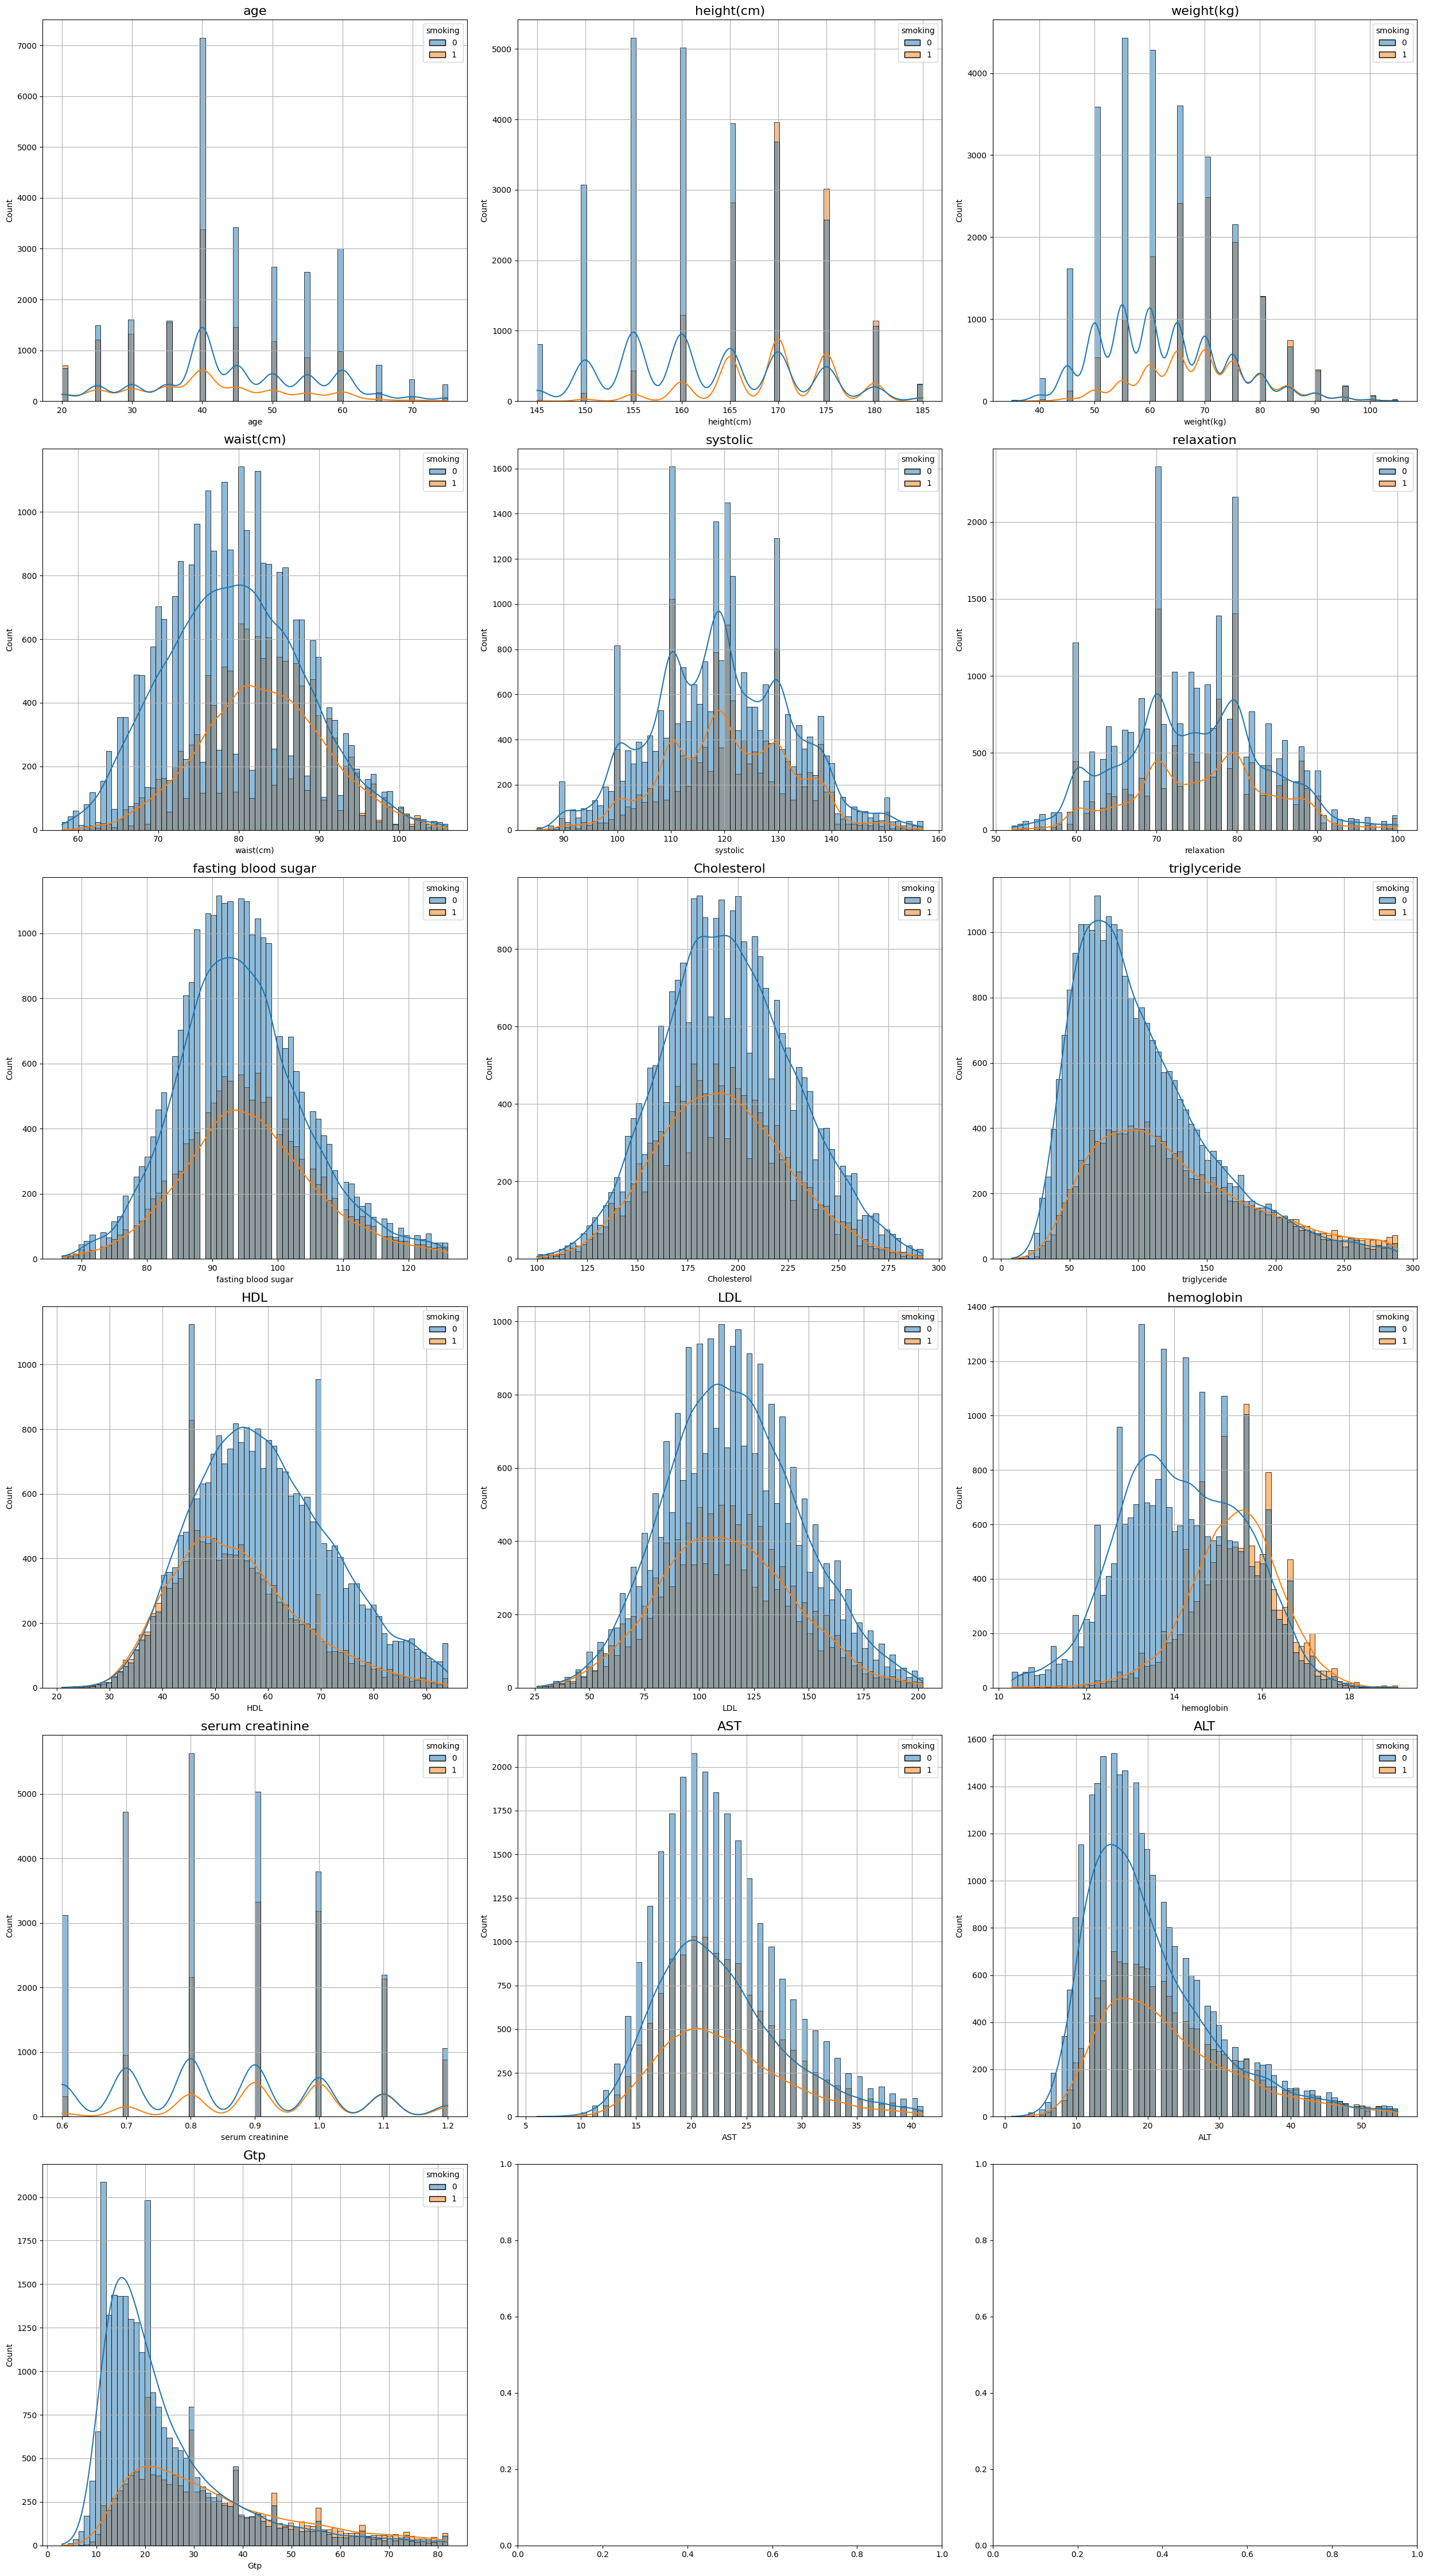

In [38]:
fig, axes = plt.subplots(6,3,figsize=(25,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(n_cols):
        break
    sns.histplot(data=df,x=n_cols[i],ax=ax,bins=70,kde=True,color='red',hue='smoking')
    ax.set_title(n_cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

**Data visualisation by using Boxplot**

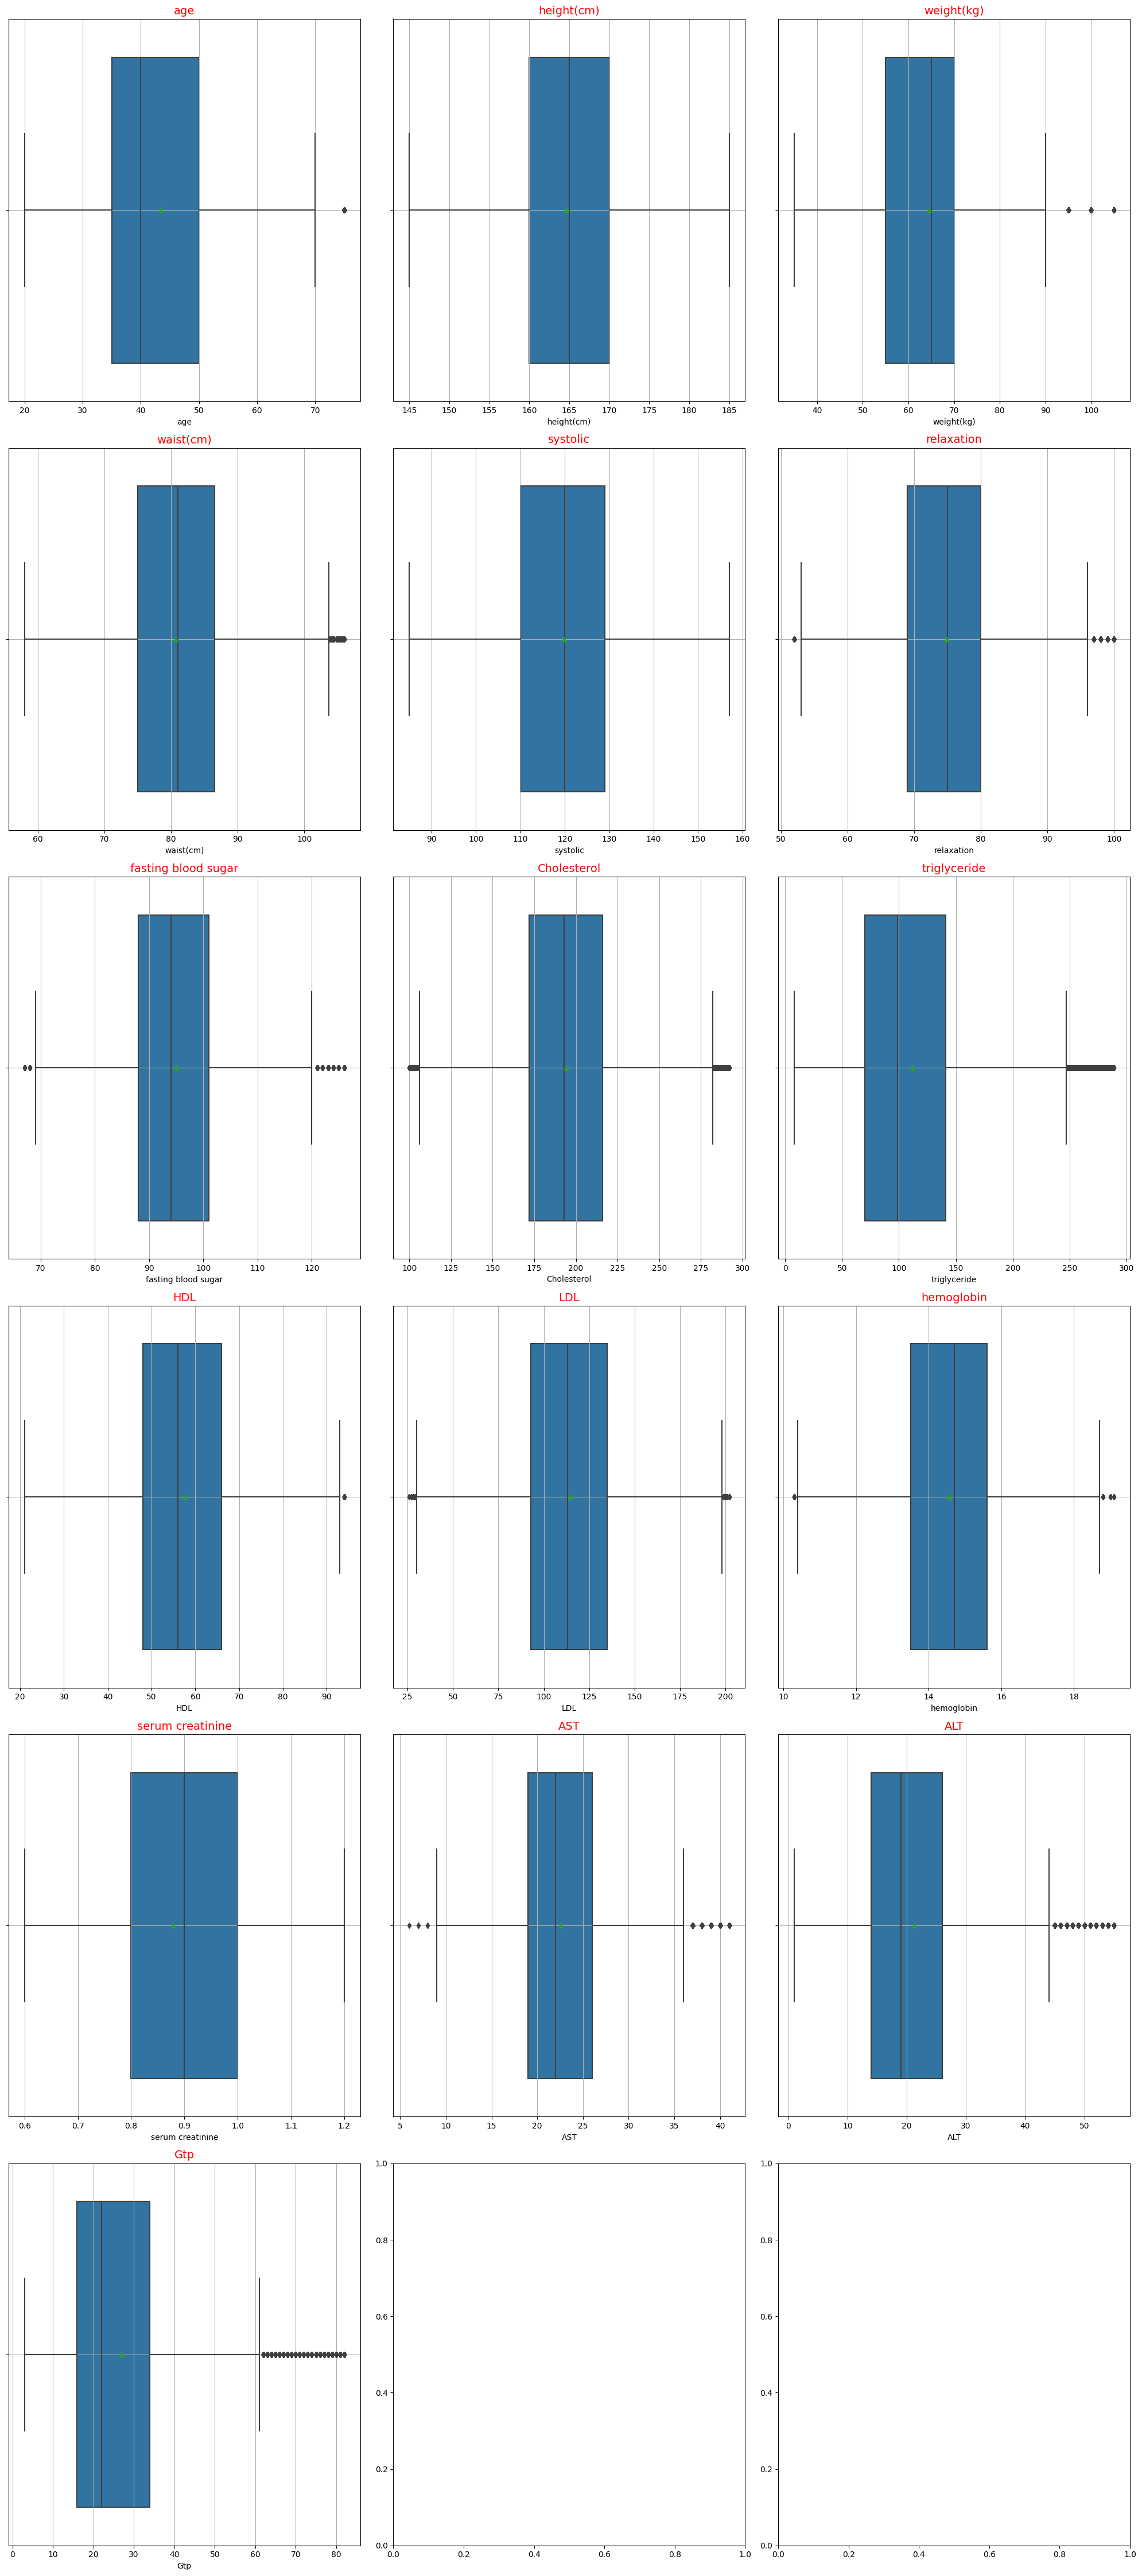

In [39]:
fig, axes = plt.subplots(6,3, figsize=(20,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(n_cols):
        break
    sns.boxplot(data=df,x=n_cols[i],ax=ax,showmeans=True,)
    ax.set_title(n_cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()

**Violin Plot**

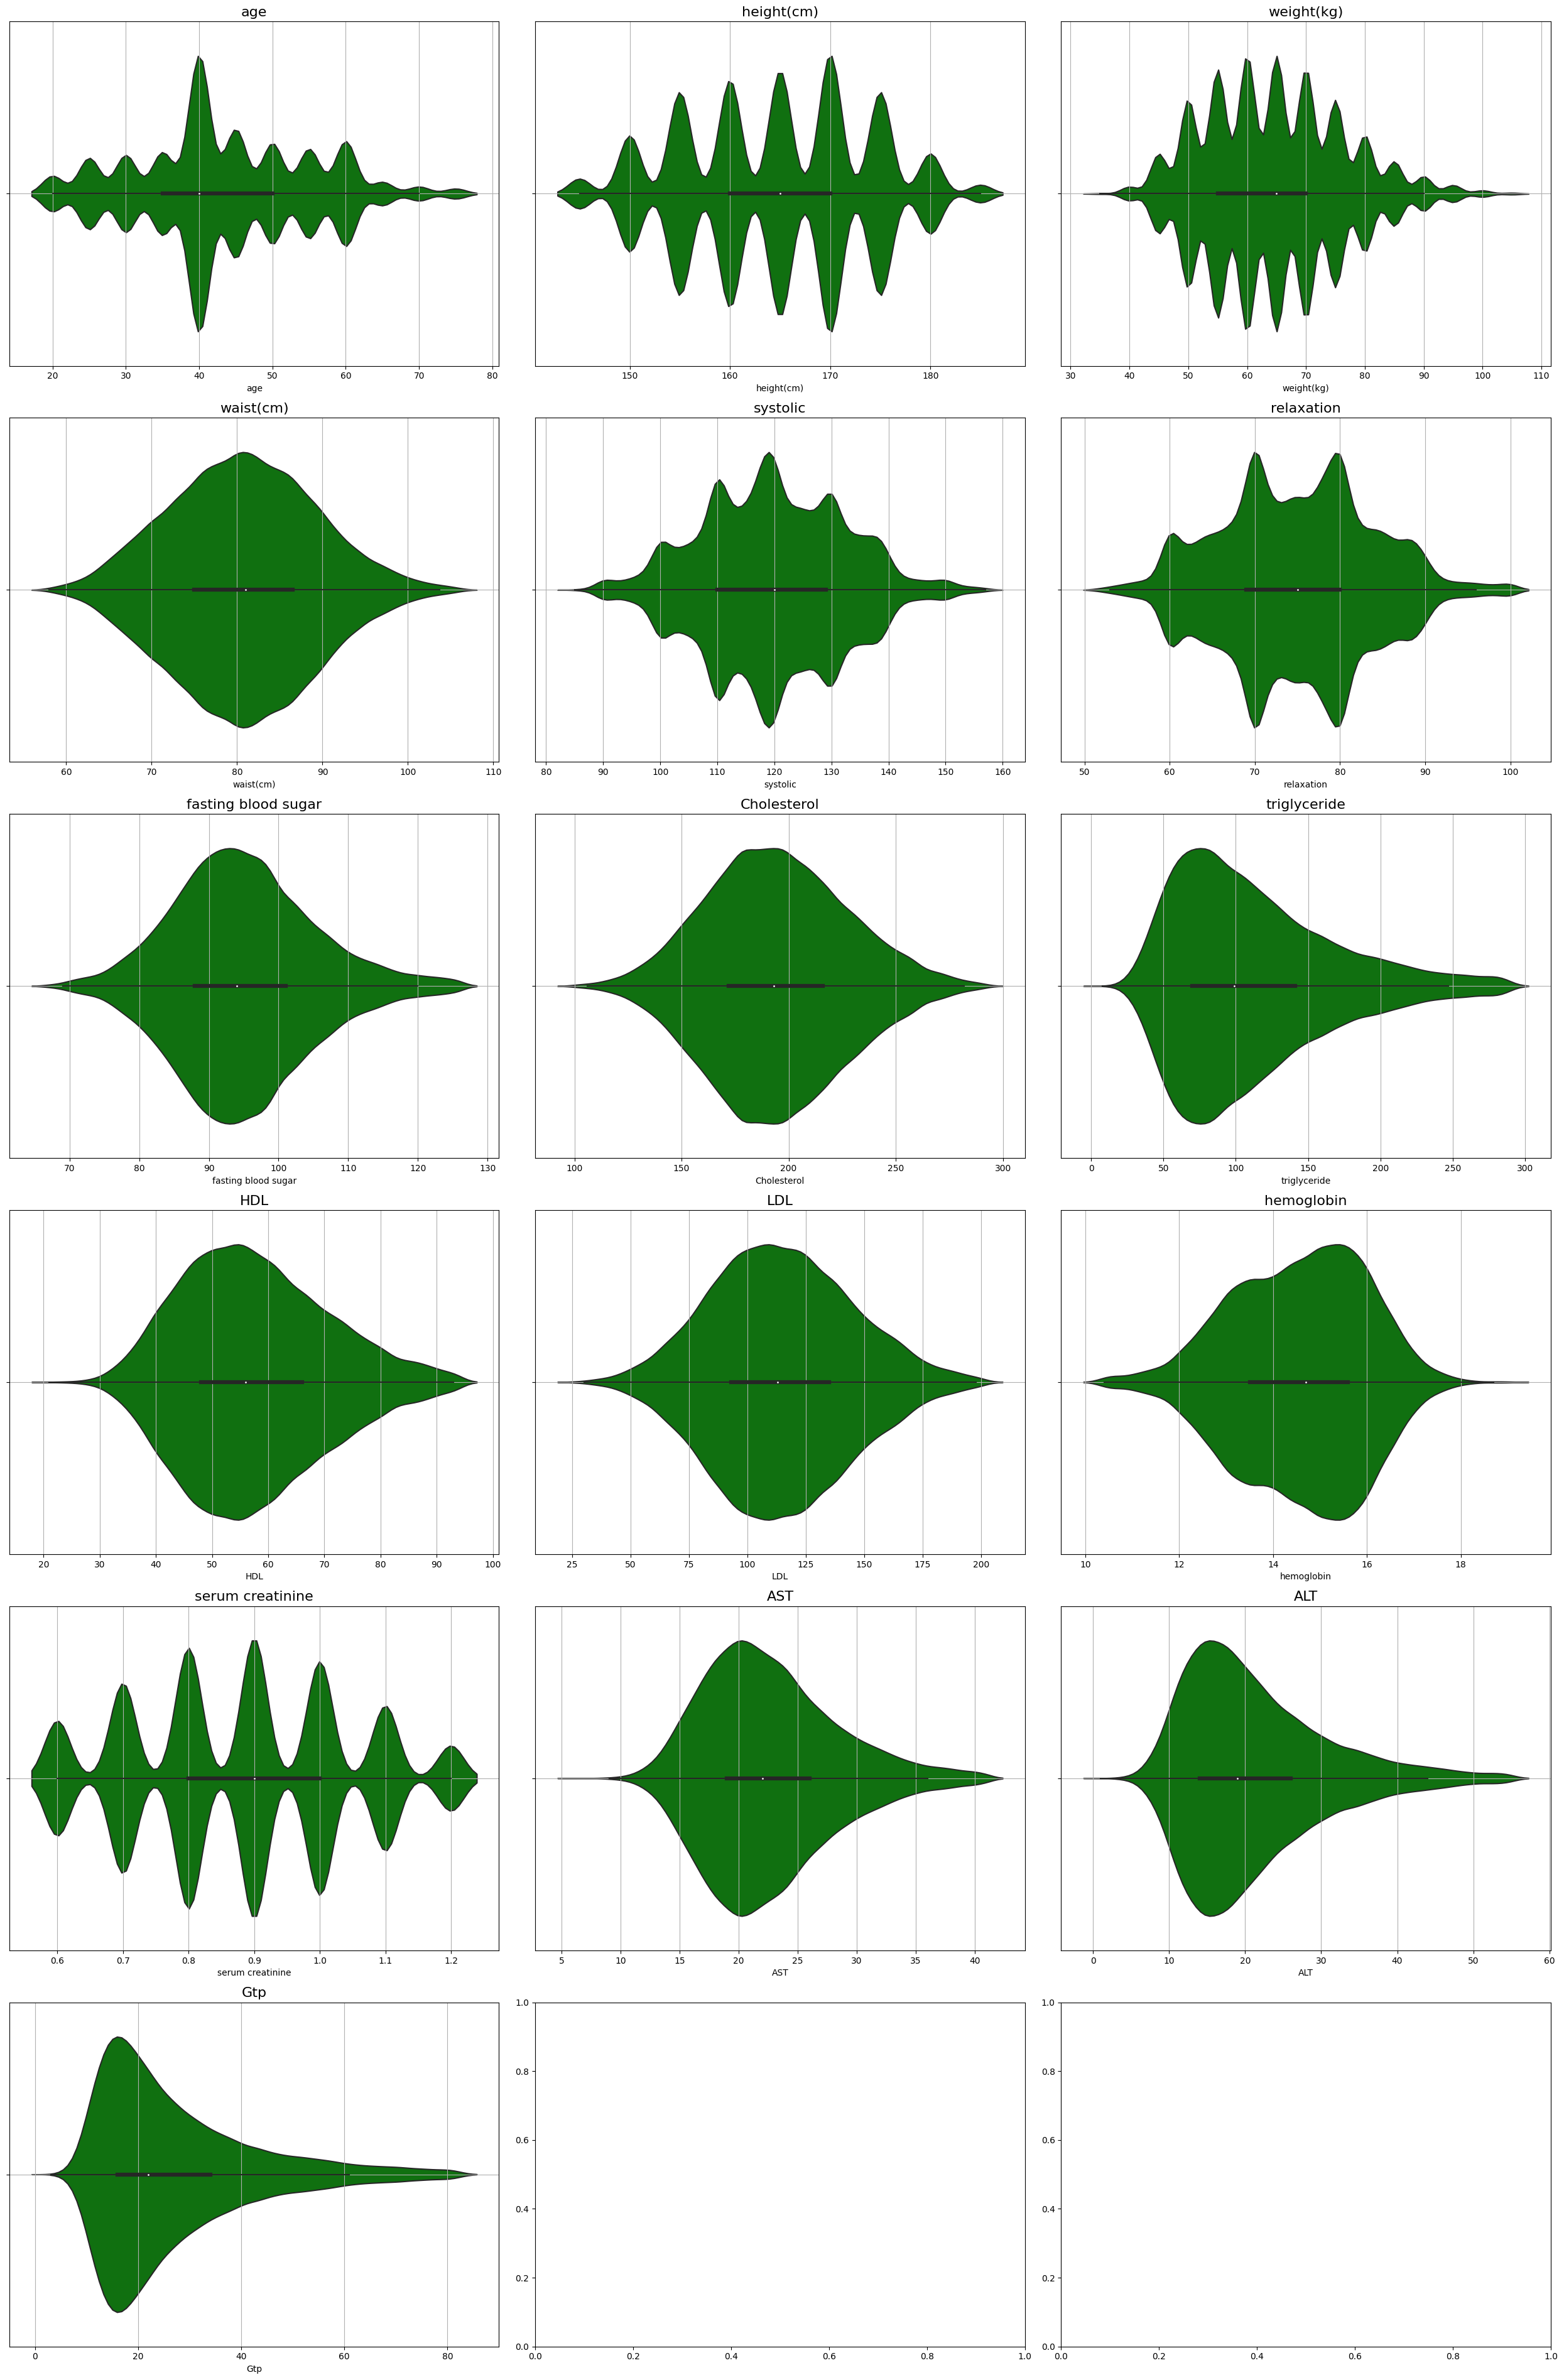

In [40]:
fig, axes = plt.subplots(6,3,figsize=(25,38))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(n_cols):
        break
    sns.violinplot(data=df,x=n_cols[i],ax=ax,color='green',)
    ax.set_title(n_cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

In [41]:
df[cat_cols].columns

Index(['gender', 'smoking'], dtype='object')

# Building Custom Pipeline for custom data handling

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38530 entries, 0 to 55691
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               38530 non-null  object 
 1   age                  38530 non-null  int64  
 2   height(cm)           38530 non-null  int64  
 3   weight(kg)           38530 non-null  int64  
 4   waist(cm)            38530 non-null  float64
 5   systolic             38530 non-null  float64
 6   relaxation           38530 non-null  float64
 7   fasting blood sugar  38530 non-null  float64
 8   Cholesterol          38530 non-null  float64
 9   triglyceride         38530 non-null  float64
 10  HDL                  38530 non-null  float64
 11  LDL                  38530 non-null  float64
 12  hemoglobin           38530 non-null  float64
 13  serum creatinine     38530 non-null  float64
 14  AST                  38530 non-null  float64
 15  ALT                  38530 non-null  floa

In [43]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from category_encoders import TargetEncoder

In [44]:
minmax_cols = ['age','height(cm)','weight(kg)','serum creatinine']
standard_cols = ['waist(cm)','systolic','relaxation','fasting blood sugar',
                 'Cholesterol','triglyceride','HDL','LDL','hemoglobin','AST','ALT','Gtp']
cat_cols = ['gender']

CT = ColumnTransformer(transformers=[
    ('minmax', MinMaxScaler(), minmax_cols),
    ('standard', StandardScaler(), standard_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])
CT

ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                 ['age', 'height(cm)', 'weight(kg)',
                                  'serum creatinine']),
                                ('standard', StandardScaler(),
                                 ['waist(cm)', 'systolic', 'relaxation',
                                  'fasting blood sugar', 'Cholesterol',
                                  'triglyceride', 'HDL', 'LDL', 'hemoglobin',
                                  'AST', 'ALT', 'Gtp']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender'])])

## Splitting the Dataset from Training and Testing

In [45]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.smoking
y=y.astype(int)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.18,random_state=13)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(31594, 17)
(6936, 17)
(31594,)
(6936,)


In [46]:
print(xtrain.columns)
print(xtest.columns)

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')
Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, confusion_matrix , ConfusionMatrixDisplay

## Initialization of Hyperparameters

In [48]:
param_rs_gs_dt = {'model__criterion':['entropy','gini','log_loss'],
                  'model__max_depth': range(4,28),
                  'model__splitter':['best','random']
}
param_gs_rs_kn = { 'model__n_neighbors':[i for i in range(7,24,2)],
                 'model__weights':['uniform','distance'],
                 'model__metric':['euclidean','manhattan','minkowski']}

In [49]:
models={'Logistic Regression': Pipeline([('transformer',CT),('model',LogisticRegression())]),
        'Decision Tree': Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
        'Random Forest': Pipeline([('transformer',CT),('model',RandomForestClassifier(n_estimators=900,criterion='entropy'))]),
        'Nearest neighbors': Pipeline([('transformer',CT),('model',KNeighborsClassifier(n_neighbors=21, algorithm='auto'))]),
        'SVM': Pipeline([('transformer',CT),('model',SVC(kernel='rbf',probability=True))]),
        'GridSearchCvKN': GridSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                       param_grid=param_gs_rs_kn,cv=4,),
        'GridSearchCVDT': GridSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                       param_grid=param_rs_gs_dt,cv=4,),
        'RandomizedSearchDT': RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                        param_distributions=param_rs_gs_dt,cv = 4,n_iter=7,random_state=42,),
        'RandomizedSearchCVKN': RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                        param_distributions=param_gs_rs_kn,cv=4,),
        'Bagging Classifier': Pipeline([('transformer',CT),('model',BaggingClassifier(random_state=23))]),
        'Extra Tree Classifier': Pipeline([('transformer',CT),('model',ExtraTreesClassifier(random_state=23))]),
        'XGBoost Classifier': Pipeline([('transformer',CT),('model',XGBClassifier(eval_metric='logloss',random_state=23,
                                        use_label_encoder=False,n_estimators=45,sampling_method='gradient_based',))])}
        
models.items()

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['age', 'height(cm)',
                                                   'weight(kg)',
                                                   'serum creatinine']),
                                                 ('standard', StandardScaler(),
                                                  ['waist(cm)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin', 'AST', 'ALT',
                                                   'Gtp']),
                                                 ('onehot',
     

In [50]:
CT

ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                 ['age', 'height(cm)', 'weight(kg)',
                                  'serum creatinine']),
                                ('standard', StandardScaler(),
                                 ['waist(cm)', 'systolic', 'relaxation',
                                  'fasting blood sugar', 'Cholesterol',
                                  'triglyceride', 'HDL', 'LDL', 'hemoglobin',
                                  'AST', 'ALT', 'Gtp']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender'])])

# Model Training

Fitting Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Name: Logistic Regression
Accuracy Score: 0.7380
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4556
           1       0.62      0.60      0.61      2380

    accuracy                           0.74      6936
   macro avg       0.71      0.71      0.71      6936
weighted avg       0.74      0.74      0.74      6936



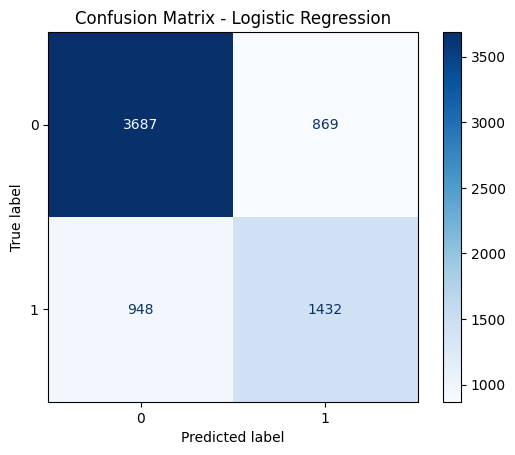

************************************************************************************************************************
Fitting Decision Tree

Model Name: Decision Tree
Accuracy Score: 0.7948
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4556
           1       0.70      0.69      0.70      2380

    accuracy                           0.79      6936
   macro avg       0.77      0.77      0.77      6936
weighted avg       0.79      0.79      0.79      6936



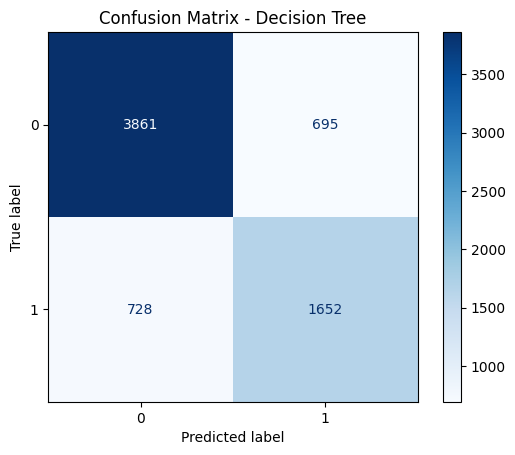

************************************************************************************************************************
Fitting Random Forest

Model Name: Random Forest
Accuracy Score: 0.8351
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4556
           1       0.76      0.77      0.76      2380

    accuracy                           0.84      6936
   macro avg       0.82      0.82      0.82      6936
weighted avg       0.84      0.84      0.84      6936



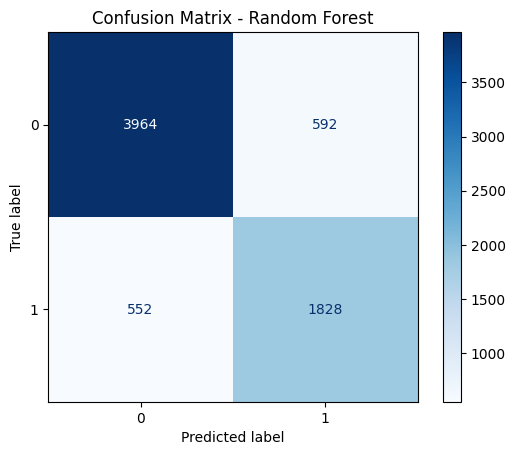

************************************************************************************************************************
Fitting Nearest neighbors

Model Name: Nearest neighbors
Accuracy Score: 0.7275
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4556
           1       0.61      0.58      0.59      2380

    accuracy                           0.73      6936
   macro avg       0.70      0.69      0.69      6936
weighted avg       0.72      0.73      0.73      6936



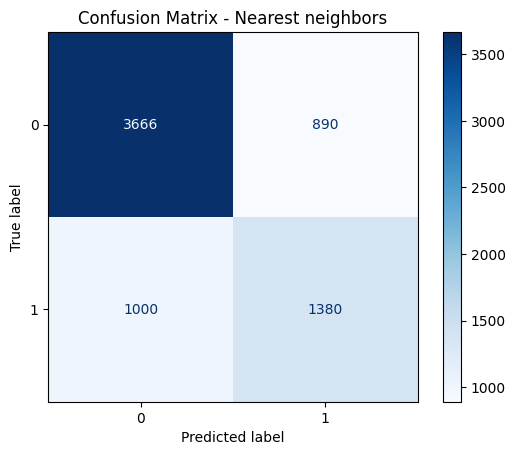

************************************************************************************************************************
Fitting SVM

Model Name: SVM
Accuracy Score: 0.7483
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      4556
           1       0.63      0.66      0.64      2380

    accuracy                           0.75      6936
   macro avg       0.72      0.73      0.72      6936
weighted avg       0.75      0.75      0.75      6936



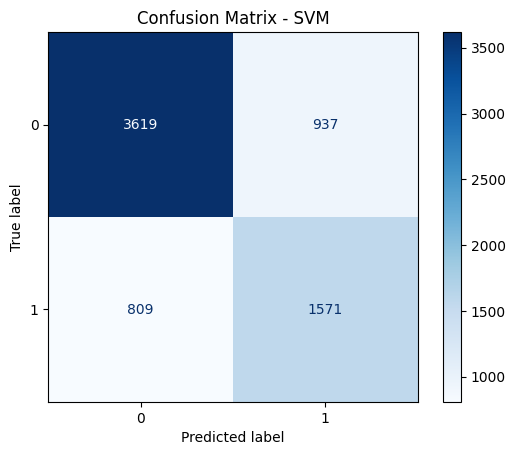

************************************************************************************************************************
Fitting GridSearchCvKN
Best parameters for GridSearchCvKN: {'model__metric': 'euclidean', 'model__n_neighbors': 19, 'model__weights': 'distance'}

Model Name: GridSearchCvKN
Accuracy Score: 0.8055
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4556
           1       0.72      0.70      0.71      2380

    accuracy                           0.81      6936
   macro avg       0.78      0.78      0.78      6936
weighted avg       0.80      0.81      0.80      6936



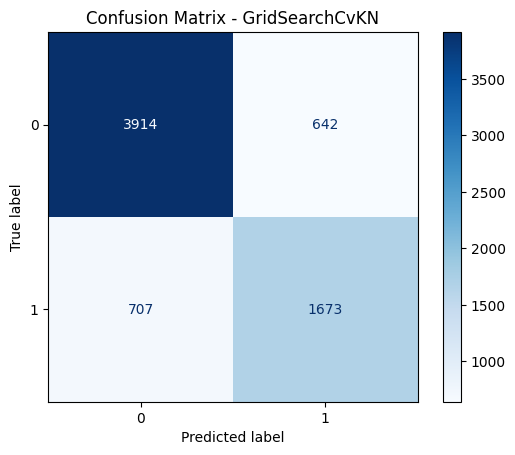

************************************************************************************************************************
Fitting GridSearchCVDT
Best parameters for GridSearchCVDT: {'model__criterion': 'gini', 'model__max_depth': 23, 'model__splitter': 'best'}

Model Name: GridSearchCVDT
Accuracy Score: 0.7892
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4556
           1       0.70      0.68      0.69      2380

    accuracy                           0.79      6936
   macro avg       0.77      0.76      0.76      6936
weighted avg       0.79      0.79      0.79      6936



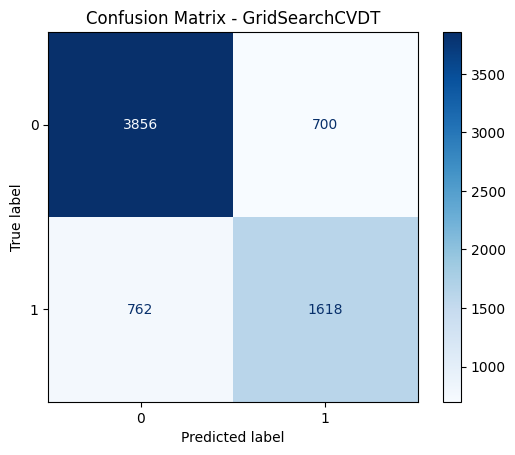

************************************************************************************************************************
Fitting RandomizedSearchDT
Best parameters for RandomizedSearchDT: {'model__splitter': 'best', 'model__max_depth': 21, 'model__criterion': 'gini'}

Model Name: RandomizedSearchDT
Accuracy Score: 0.7914
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4556
           1       0.70      0.68      0.69      2380

    accuracy                           0.79      6936
   macro avg       0.77      0.77      0.77      6936
weighted avg       0.79      0.79      0.79      6936



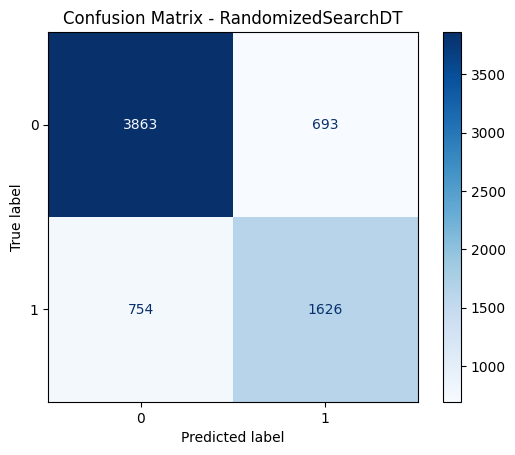

************************************************************************************************************************
Fitting RandomizedSearchCVKN
Best parameters for RandomizedSearchCVKN: {'model__weights': 'distance', 'model__n_neighbors': 23, 'model__metric': 'manhattan'}

Model Name: RandomizedSearchCVKN
Accuracy Score: 0.8094
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4556
           1       0.73      0.71      0.72      2380

    accuracy                           0.81      6936
   macro avg       0.79      0.79      0.79      6936
weighted avg       0.81      0.81      0.81      6936



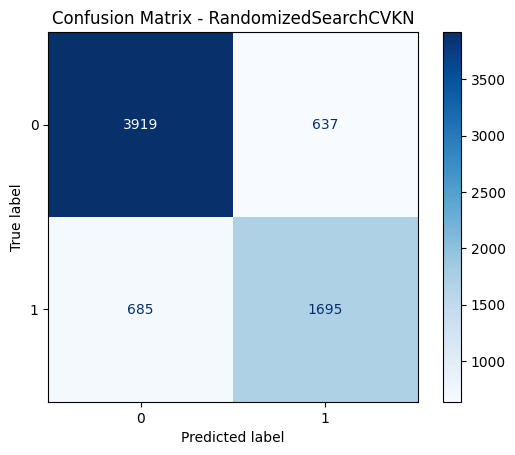

************************************************************************************************************************
Fitting Bagging Classifier

Model Name: Bagging Classifier
Accuracy Score: 0.8094
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4556
           1       0.76      0.65      0.70      2380

    accuracy                           0.81      6936
   macro avg       0.79      0.77      0.78      6936
weighted avg       0.81      0.81      0.81      6936



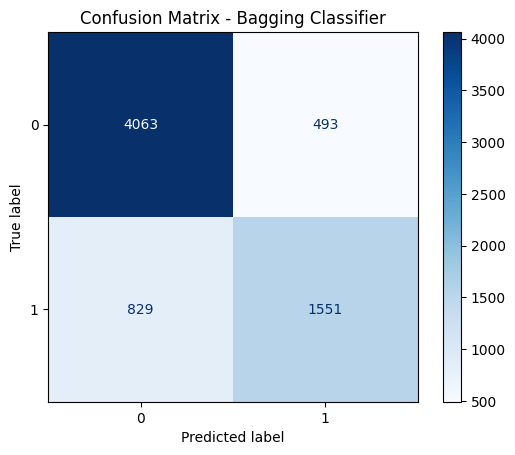

************************************************************************************************************************
Fitting Extra Tree Classifier

Model Name: Extra Tree Classifier
Accuracy Score: 0.8312
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4556
           1       0.75      0.75      0.75      2380

    accuracy                           0.83      6936
   macro avg       0.81      0.81      0.81      6936
weighted avg       0.83      0.83      0.83      6936



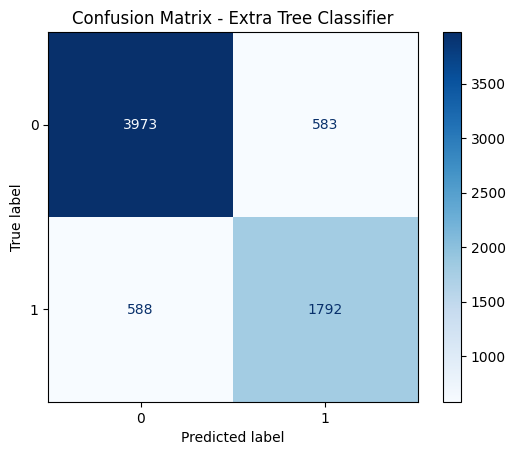

************************************************************************************************************************
Fitting XGBoost Classifier

Model Name: XGBoost Classifier
Accuracy Score: 0.7611
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4556
           1       0.65      0.66      0.65      2380

    accuracy                           0.76      6936
   macro avg       0.74      0.74      0.74      6936
weighted avg       0.76      0.76      0.76      6936



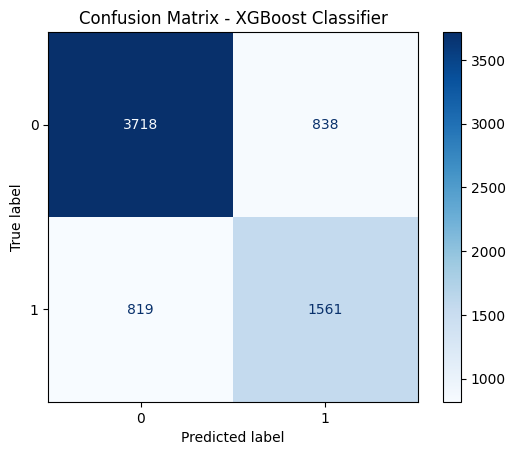

************************************************************************************************************************


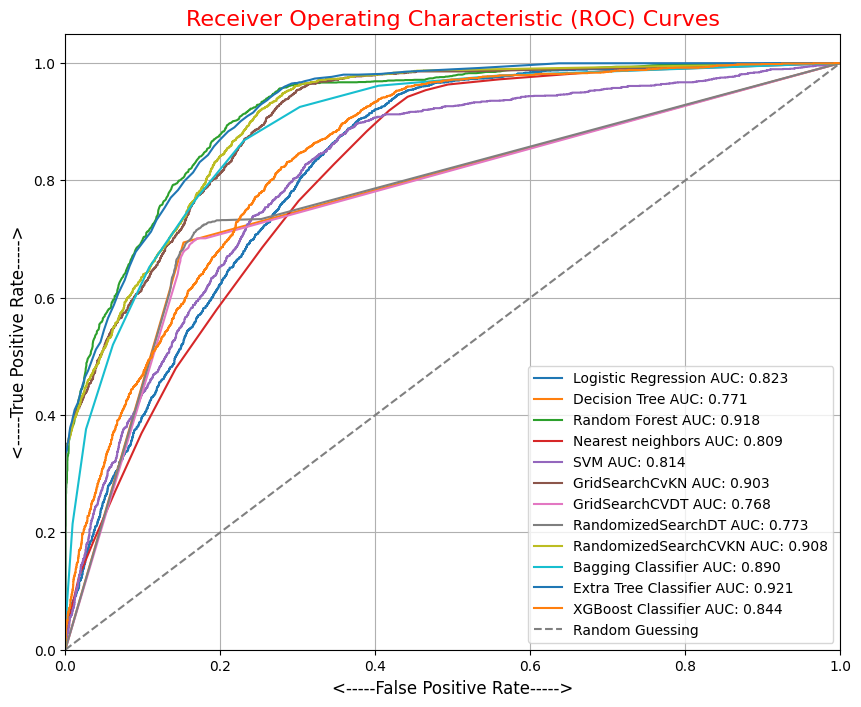


 Best Model: Extra Tree Classifier with AUC: 0.9206


In [51]:
# Initializing variables to store best model info
best_auc = 0
best_model_name = None
best_model_object = None

# Storing FPR, TPR for all models for final AUC plot
roc_curves = []

for model_name, model in models.items():
    print(f'Fitting {model_name}')
    
    # Train model
    if isinstance(model, (GridSearchCV, RandomizedSearchCV)):
        model.fit(xtrain, ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
    else:
        best_model = model
        best_model.fit(xtrain, ytrain)

    ypred = best_model.predict(xtest)
    ypred_proba = best_model.predict_proba(xtest)[:, 1]
    
    acc = accuracy_score(ytest, ypred)
    report = classification_report(ytest, ypred)
    cm = confusion_matrix(ytest, ypred)
    fpr, tpr, _ = roc_curve(ytest, ypred_proba)
    roc_auc = auc(fpr, tpr)

    # Tracking the best model
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_model_name = model_name
        best_model_object = best_model

    print(f'\nModel Name: {model_name}')
    print(f'Accuracy Score: {acc:.4f}')
    print(report)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Save ROC info for later
    roc_curves.append((f"{model_name} AUC: {roc_auc:.3f}", fpr, tpr))
    print('*****' * 24)

# Plotting ROC curve of all models
plt.figure(figsize=(10, 8))
for label, fpr, tpr in roc_curves:
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('<-----False Positive Rate----->', fontsize=12)
plt.ylabel('<-----True Positive Rate----->', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16, color='red')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"\n Best Model: {best_model_name} with AUC: {best_auc:.4f}")

In [52]:
sample_data = {
    'age': [45],
    'height(cm)': [170],
    'weight(kg)': [70],
    'serum creatinine': [1.2],
    'waist(cm)': [80],
    'systolic': [130],
    'relaxation': [80],
    'fasting blood sugar': [100],
    'Cholesterol': [200],
    'triglyceride': [150],
    'HDL': [50],
    'LDL': [120],
    'hemoglobin': [14],
    'AST': [25],
    'ALT': [30],
    'Gtp': [40],
    'gender': ['Male']
}
sample_df = pd.DataFrame(sample_data)
print(type(sample_df))

<class 'pandas.core.frame.DataFrame'>


In [53]:
prediction = best_model_object.predict(sample_df)
print(prediction)
predicted_proba = best_model_object.predict_proba(sample_df)[0][1]
print(f"Prediction Probability is {predicted_proba:.4f}")

[0]
Prediction Probability is 0.2300


**Insights**
* Model predicted that the sample belongs to a class[0] which means a Non-Smoker.
* Predicttion Probability means the model estimates there is a 23.00% probability that the sample belongs to class 1 (e.g., "Positive" or "Smoker" class).
Conversely, there's a 77.00% chance it's class 0 (the Non-Smoker class).

# Conclusion

* Both Random Forest Classifier and Extra Trees Classifier achieved an accuracy of 83%. However, Extra Trees Classifier slightly outperformed Random Forest in terms of AUC, scoring 0.92   compared to Random Forest's 0.918.
* KNN model normaly gives accuracy of approx. 73% & AUC 0.809, with hyperparameter tunning using GridSearchCV and RandomizedSearchCV the accuracy improved to 81% with AUC score 0.903.
* Bootstrap Aggrigation or Bagging thus outperformed Traditional Machine Learning in terms of overfitting, better generalization.
